In [8]:
import pandas as pd

# Load the dataset
temperature_conflict_df = pd.read_csv(r"C:\Users\sunil\Downloads\temperature_conflict.csv")

# Print column names
print(temperature_conflict_df.columns)


Index(['Date', 'Month', 'Year', 'Species', 'Conflict_Type', 'Location (GPS)',
       'Forest_Distance (km)', 'Crop_Stage', 'Temperature (°C)'],
      dtype='object')


In [13]:
import pandas as pd
import numpy as np

# Load datasets
# temperature_conflict_df = pd.read_csv(r'C:\Users\sunil\Downloads\temporal_analysis.csv')
spatial_hotspot_df = pd.read_csv(r'C:\Users\sunil\Downloads\conflict_compensation.csv')
species_df = pd.read_csv(r'C:\Users\sunil\Downloads\species.csv')
conflict_compensation_df = pd.read_csv(r'C:\Users\sunil\Downloads\spatial_hotspot.csv')
temporal_analysis_df = pd.read_csv(r'C:\Users\sunil\Downloads\temperature_conflict.csv')





# Load the dataset
temperature_conflict_df = pd.read_csv(r"C:\Users\sunil\Downloads\temperature_conflict.csv")

# Convert column names to remove spaces
temperature_conflict_df.columns = temperature_conflict_df.columns.str.strip()

# Convert 'Date' column to datetime format
temperature_conflict_df["Date"] = pd.to_datetime(temperature_conflict_df["Date"], format="%d/%m/%Y")

# Check for missing values
print(temperature_conflict_df.isnull().sum())

# Select only numeric columns for median filling
numeric_cols = temperature_conflict_df.select_dtypes(include=["number"]).columns
temperature_conflict_df[numeric_cols] = temperature_conflict_df[numeric_cols].fillna(temperature_conflict_df[numeric_cols].median())

# Convert categorical variables to lowercase for consistency
temperature_conflict_df["Species"] = temperature_conflict_df["Species"].str.lower()

# Print dataset after processing
print(temperature_conflict_df.head())




Date                    0
Month                   0
Year                    0
Species                 0
Conflict_Type           0
Location (GPS)          0
Forest_Distance (km)    0
Crop_Stage              0
Temperature (°C)        0
dtype: int64
        Date     Month  Year   Species Conflict_Type        Location (GPS)  \
0 2023-06-15      June  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   
1 2023-11-22  November  2023  wild pig   Crop Damage  11.0168°N, 76.9558°E   
2 2023-08-10    August  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   
3 2023-01-05   January  2023  wild pig   Crop Damage  11.0168°N, 76.9558°E   
4 2023-07-20      July  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   

   Forest_Distance (km) Crop_Stage  Temperature (°C)  
0                   5.2    Harvest              28.5  
1                   3.8   Planting              26.0  
2                   4.5    Harvest              30.2  
3                   2.1   Planting              27.8  
4        

In [14]:
# Define month mapping
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Convert 'Month' column to numeric values
temperature_conflict_df["Month"] = temperature_conflict_df["Month"].map(month_mapping)

# Print dataset after processing
print(temperature_conflict_df.head())


        Date  Month  Year   Species Conflict_Type        Location (GPS)  \
0 2023-06-15      6  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   
1 2023-11-22     11  2023  wild pig   Crop Damage  11.0168°N, 76.9558°E   
2 2023-08-10      8  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   
3 2023-01-05      1  2023  wild pig   Crop Damage  11.0168°N, 76.9558°E   
4 2023-07-20      7  2023  elephant   Crop Damage  12.7369°N, 77.8326°E   

   Forest_Distance (km) Crop_Stage  Temperature (°C)  
0                   5.2    Harvest              28.5  
1                   3.8   Planting              26.0  
2                   4.5    Harvest              30.2  
3                   2.1   Planting              27.8  
4                   6.0    Harvest              29.4  


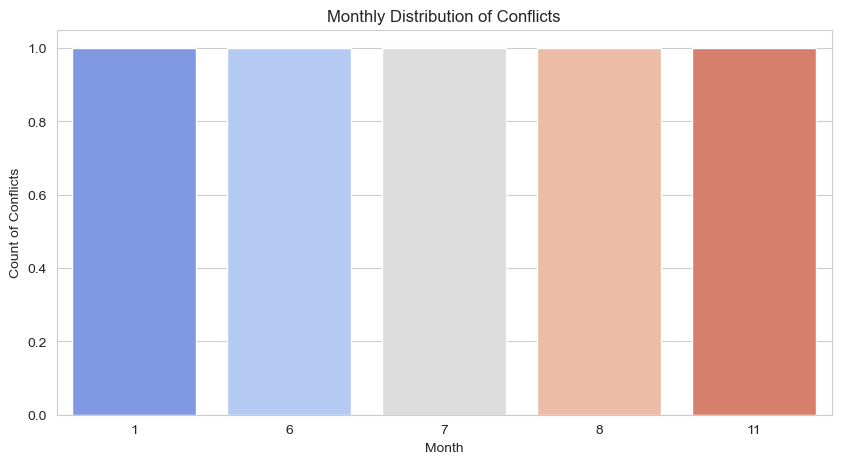

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Monthly conflict trend
plt.figure(figsize=(10, 5))
sns.countplot(x="Month", data=temperature_conflict_df, palette="coolwarm")
plt.title("Monthly Distribution of Conflicts")
plt.xlabel("Month")
plt.ylabel("Count of Conflicts")
plt.show()


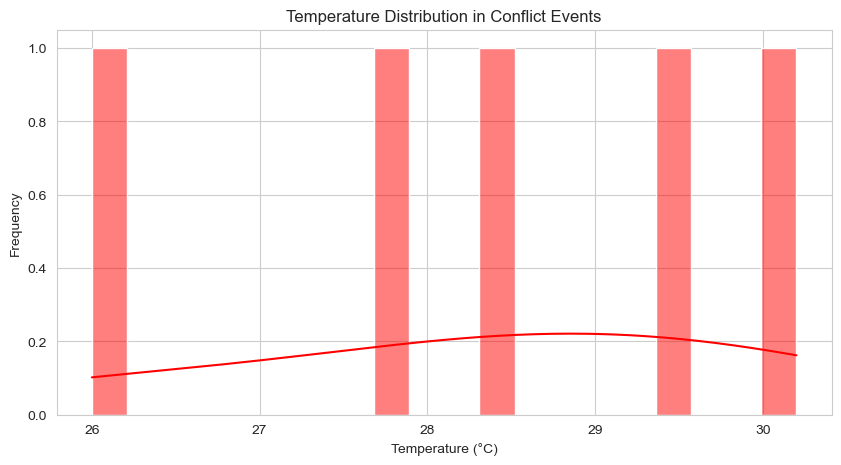

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(temperature_conflict_df["Temperature (°C)"], bins=20, kde=True, color="red")
plt.title("Temperature Distribution in Conflict Events")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


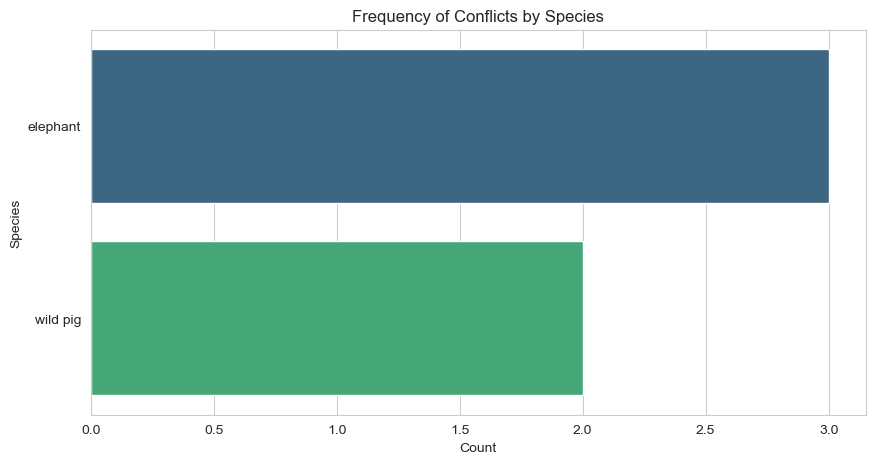

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Species", data=temperature_conflict_df, palette="viridis", order=temperature_conflict_df["Species"].value_counts().index)
plt.title("Frequency of Conflicts by Species")
plt.xlabel("Count")
plt.ylabel("Species")
plt.show()


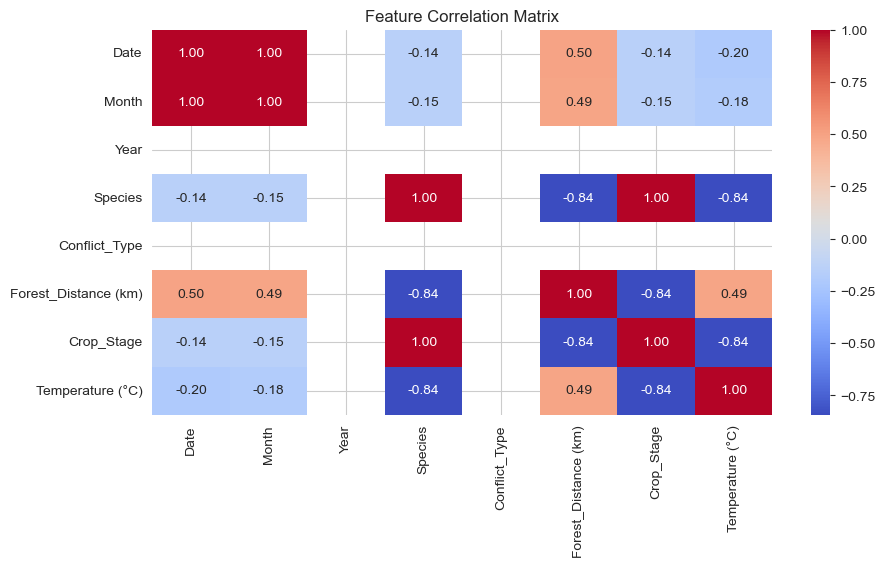

In [26]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns (excluding GPS)
categorical_cols = ["Species", "Conflict_Type", "Crop_Stage"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    temperature_conflict_df[col] = le.fit_transform(temperature_conflict_df[col])
    label_encoders[col] = le  # Store encoders for later decoding

# Drop non-numeric column (GPS) before correlation
numeric_df = temperature_conflict_df.drop(columns=["Location (GPS)"])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [27]:
import pandas as pd

# Function to extract numeric latitude and longitude
def extract_lat_lon(gps_string):
    try:
        lat, lon = gps_string.split(", ")
        lat = float(lat[:-2]) if "N" in lat else -float(lat[:-2])
        lon = float(lon[:-2]) if "E" in lon else -float(lon[:-2])
        return pd.Series([lat, lon])
    except:
        return pd.Series([None, None])

# Apply function to extract latitude & longitude
temperature_conflict_df[['Latitude', 'Longitude']] = temperature_conflict_df['Location (GPS)'].apply(extract_lat_lon)

# Drop the original Location (GPS) column
temperature_conflict_df.drop(columns=['Location (GPS)'], inplace=True)

# Display first few rows to verify
print(temperature_conflict_df.head())


        Date  Month  Year  Species  Conflict_Type  Forest_Distance (km)  \
0 2023-06-15      6  2023        0              0                   5.2   
1 2023-11-22     11  2023        1              0                   3.8   
2 2023-08-10      8  2023        0              0                   4.5   
3 2023-01-05      1  2023        1              0                   2.1   
4 2023-07-20      7  2023        0              0                   6.0   

   Crop_Stage  Temperature (°C)  Latitude  Longitude  
0           0              28.5   12.7369    77.8326  
1           1              26.0   11.0168    76.9558  
2           0              30.2   12.7369    77.8326  
3           1              27.8   11.0168    76.9558  
4           0              29.4   12.7369    77.8326  


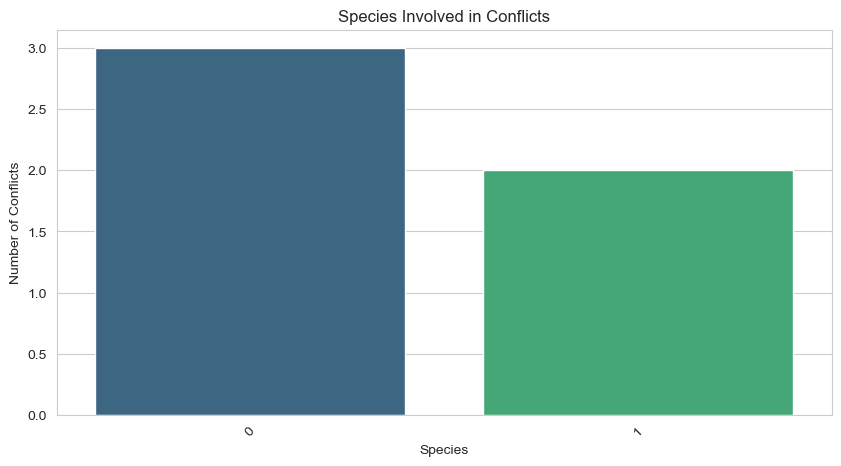

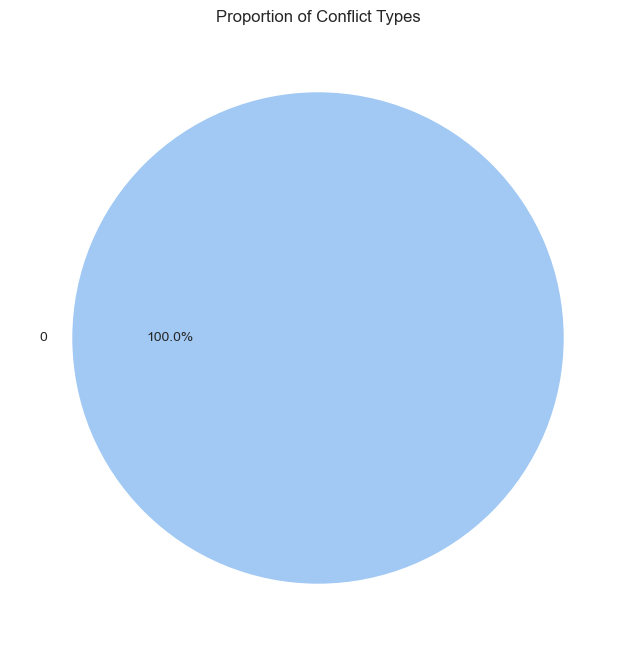

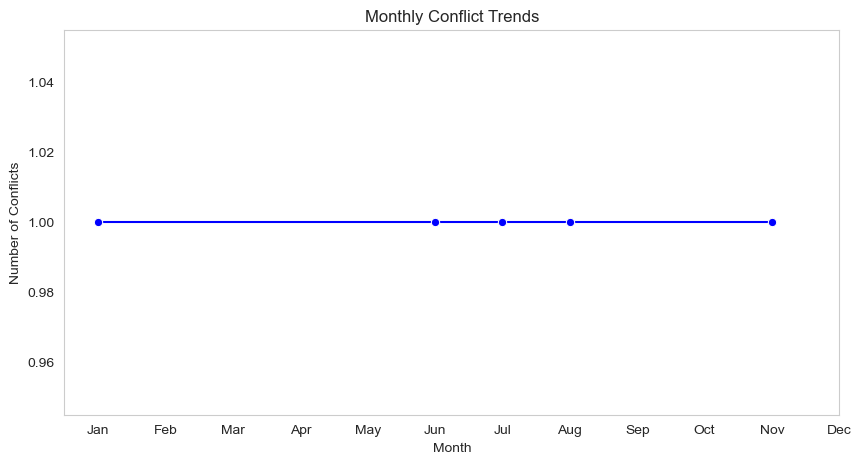

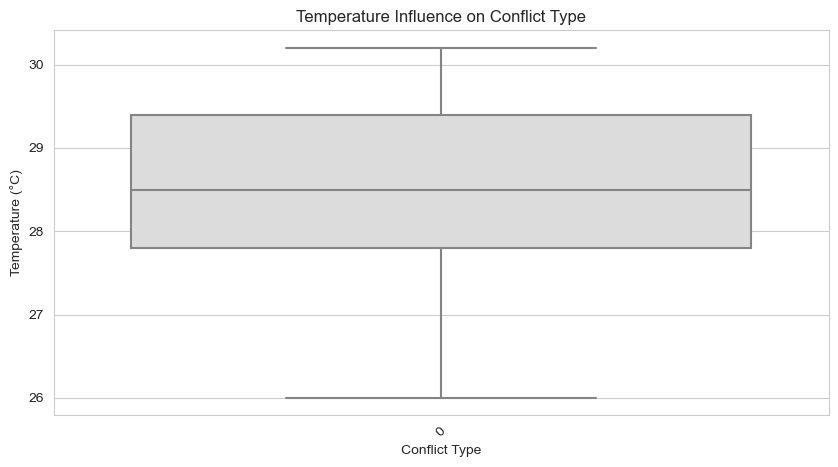

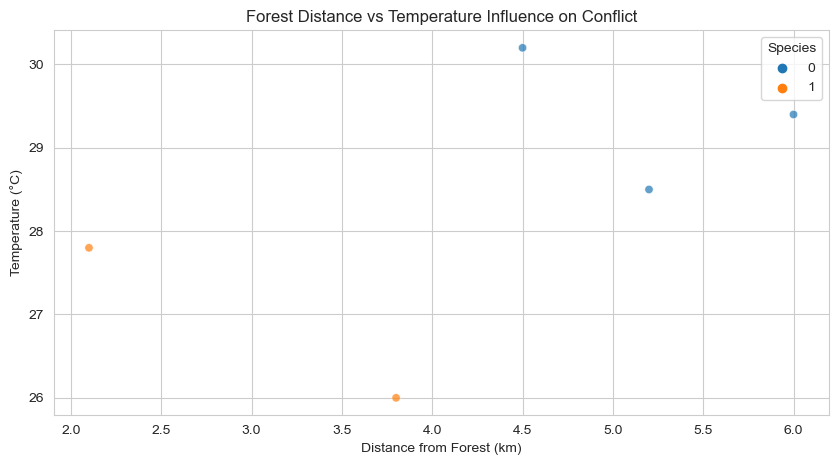

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Species Conflict Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x="Species", data=temperature_conflict_df, palette="viridis", order=temperature_conflict_df["Species"].value_counts().index)
plt.title("Species Involved in Conflicts")
plt.xlabel("Species")
plt.ylabel("Number of Conflicts")
plt.xticks(rotation=45)
plt.show()

# Step 2: Conflict Type Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
temperature_conflict_df["Conflict_Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proportion of Conflict Types")
plt.ylabel("")
plt.show()

# Step 3: Monthly Conflict Trends
# Step 3: Monthly Conflict Trends (Fixed)
monthly_conflicts = temperature_conflict_df.groupby("Month")["Species"].count().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Species", data=monthly_conflicts, marker="o", color="b")
plt.title("Monthly Conflict Trends")
plt.xlabel("Month")
plt.ylabel("Number of Conflicts")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# Step 4: Temperature vs Conflict Frequency (Box Plot)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Conflict_Type", y="Temperature (°C)", data=temperature_conflict_df, palette="coolwarm")
plt.title("Temperature Influence on Conflict Type")
plt.xlabel("Conflict Type")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()

# Step 5: Forest Distance Impact (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Forest_Distance (km)", y="Temperature (°C)", hue="Species", data=temperature_conflict_df, palette="tab10", alpha=0.7)
plt.title("Forest Distance vs Temperature Influence on Conflict")
plt.xlabel("Distance from Forest (km)")
plt.ylabel("Temperature (°C)")
plt.legend(title="Species", bbox_to_anchor=(1, 1))
plt.show()
